<a href="https://colab.research.google.com/github/Arjunsr12/Tomato_Price_Prediction/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [379]:
import pandas as pd
import numpy as np

In [380]:
production_data = pd.read_excel('/content/production month wise.xlsx')
temp_data = pd.read_excel('/content/Copy of Temperature_dataset(1).xlsx')
rain_data = pd.read_csv('/content/final_rain data month wise (2).csv')

In [381]:
temp_data['YEAR'] = temp_data['YEAR'].fillna(2000)

In [382]:
rain_data

,District_Name,Market_Name,Month,Year,Rain,Modal_Price
0,HASSAN,Arasikere,December,2019,25.20,975
1,HASSAN,Arasikere,April,2020,47.20,750
2,HASSAN,Arasikere,December,2020,16.40,1000
3,HASSAN,Arasikere,January,2020,0.20,1000
4,HASSAN,Arasikere,April,2019,41.90,1000
...,...,...,...,...,...,...
33496,UDUPI,Udupi,June,2015,78.27,2500
33497,UDUPI,Udupi,October,2020,401.10,2600
33498,UDUPI,Udupi,July,2020,1275.60,3100
33499,UDUPI,Udupi,July,2016,283.31,3100


In [383]:
rain_data['District_Name'].value_counts()

,count
District_Name,
KOLAR,12884
BENGALURU URBAN,7243
CHIKKAMAGALURU,3228
MYSURU,2652
DAVANGERE,2030
CHAMARAJANAGAR,1103
HASSAN,1031
SHIVAMOGGA,809
BALLARI,701


In [384]:
temp_data['YEAR']=temp_data['YEAR'].astype(int)

In [385]:
temp_data['District'].value_counts()

,count
District,
Bagalkote,23
Haveri,23
Udupi,23
YADGIRI,23
UTTARA KANNADA,23
Tumkur,23
Shivmogga,23
Ramnagar,23
Raichur,23


In [386]:
production_data

,District,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,BAGALKOTE,2015,520,525,523,525.0,495,500,498,500.0,510,515,520,520.0
1,BANGALORE-URBAN,2015,1620,1635,1627,1626.0,840,845,835,834.0,925,930,920,926.0
2,BANGALORE-RURAL,2015,2740,2745,2746,2760.0,620,625,624,624.0,690,695,685,690.0
3,BELGAUM,2015,2425,2420,2423,2427.0,2500,2520,2515,2526.0,3350,3360,3370,3353.0
4,BELLARY,2015,1750,1760,1758,1757.0,1230,1240,1235,1238.0,1885,1895,1887,1898.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,CHIKMAGALUR,2020,5029,5030,5030,5030.0,6004,6005,6004,6005.0,744,744,744,745.0
164,HASSAN,2020,6328,6328,6328,6329.0,9395,9395,9395,9395.0,2275,2274,2275,2274.0
165,KODAGU,2020,5,5,5,5.0,0,0,0,0.0,0,0,0,0.0
166,MANDYA,2020,22480,22480,22481,22482.0,9846,9846,9846,9847.0,8786,8787,8787,8787.0


In [391]:
production_data['District'].value_counts()

,count
District,
BAGALKOTE,6
BANGALORE-URBAN,6
YADGIR,6
UTTARA KANNADA,6
TUMKUR,6
SHIMOGA,6
RAMANAGAR,6
RAICHUR,6
MYSORE,6


In [423]:
production_data_melted = production_data.melt(
    id_vars=["District", "Year"],
    value_vars=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
    var_name="Month", value_name="Production")


month_map = {
    "JAN": "January", "FEB": "February", "MAR": "March", "APR": "April",
    "MAY": "May", "JUN": "June", "JUL": "July", "AUG": "August",
    "SEP": "September", "OCT": "October", "NOV": "November", "DEC": "December"
}
production_data_melted["Month"] = production_data_melted["Month"].map(month_map)

district_map = {
    'HASSAN': 'HASSAN', 'CHIKMAGALUR': 'CHIKKAMAGALURU', 'KOLAR': 'KOLAR',
    'BELGAVI': 'BELAGAVI', 'BALLARI': 'BALLARI', 'BANGALORE-URBAN': 'BENGALURU URBAN',
    'CHAMARAJANAGAR': 'CHAMARAJANAGAR', 'DAVANAGERE': 'DAVANGERE', 'DHARWAD': 'DHARWAD',
    'GADAG': 'GADAG', 'HAVERI': 'HAVERI', 'CHITRADURGA': 'CHITRADURGA',
    'MYSORE': 'MYSURU', 'MANDYA': 'MANDYA', 'Dakshina': 'DAKSHINA KANNADA',
    'SHIMOGA': 'SHIVAMOGGA', 'RAICHUR': 'RAICHUR', 'KODAGU': 'KODAGU',
    'TUMKUR': 'TUMAKURU', 'Udupi': 'UDUPI'
}
production_data_melted["District"] = production_data_melted["District"].map(district_map)


merged_data = pd.merge(
    rain_data,
    production_data_melted,
    left_on=["District_Name", "Year", "Month"],
    right_on=["District", "Year", "Month"],
    how="inner"
)


merged_data = merged_data.drop(columns=["District"]).rename(columns={
    "District": "District_Name"
})


merged_data.to_csv('/content/min_price , max_price, district wise.csv', index=False)


merged_data


,District_Name,Market_Name,Month,Year,Rain,Modal_Price,Production
0,HASSAN,Arasikere,December,2019,25.2,975,1120.0
1,HASSAN,Arasikere,April,2020,47.2,750,6329.0
2,HASSAN,Arasikere,December,2020,16.4,1000,2274.0
3,HASSAN,Arasikere,January,2020,0.2,1000,6328.0
4,HASSAN,Arasikere,April,2019,41.9,1000,3075.0
...,...,...,...,...,...,...,...
32539,TUMAKURU,Tumkur,November,2020,39.5,1100,2339.0
32540,TUMAKURU,Tumkur,June,2020,152.1,1000,5217.0
32541,TUMAKURU,Tumkur,October,2020,102.9,1200,2338.0
32542,TUMAKURU,Tumkur,July,2020,119.2,1850,5217.0


In [424]:
merged_data['District_Name'].value_counts()

,count
District_Name,
KOLAR,12884
BENGALURU URBAN,7243
CHIKKAMAGALURU,3228
MYSURU,2652
DAVANGERE,2030
CHAMARAJANAGAR,1103
HASSAN,1031
SHIVAMOGGA,809
MANDYA,637


In [425]:
rain_data=merged_data

In [426]:
temp_data_melted = temp_data.melt(
    id_vars=["District", "YEAR"],
    value_vars=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
    var_name="Month", value_name="Temperature")


month_map = {
    "JAN": "January", "FEB": "February", "MAR": "March", "APR": "April",
    "MAY": "May", "JUN": "June", "JUL": "July", "AUG": "August",
    "SEP": "September", "OCT": "October", "NOV": "November", "DEC": "December"
}
temp_data_melted["Month"] =temp_data_melted["Month"].map(month_map)

district_map = {
    'Haasan': 'HASSAN', 'CHIKMAGALUR': 'CHIKKAMAGALURU', 'Kolar': 'KOLAR',
    'Belgavi': 'BELAGAVI', 'Ballari': 'BALLARI', 'Bangalore': 'BENGALURU URBAN',
    'Chamarajnagar': 'CHAMARAJANAGAR', 'Davangere': 'DAVANGERE', 'Dharwad': 'DHARWAD',
    'Gadag': 'GADAG', 'Haveri': 'HAVERI', 'Chitradurga': 'CHITRADURGA',
    'Mysore': 'MYSURU', 'Mandya': 'MANDYA', 'Dakshina': 'DAKSHINA KANNADA',
    'Shivmogga': 'SHIVAMOGGA', 'Raichur': 'RAICHUR', 'Kodagu': 'KODAGU',
    'Tumkur': 'TUMAKURU', 'Udupi': 'UDUPI'
}
temp_data_melted["District"] = temp_data_melted["District"].map(district_map)


merged_data = pd.merge(
    rain_data,
    temp_data_melted,
    left_on=["District_Name", "Year", "Month"],
    right_on=["District", "YEAR", "Month"],
    how="inner"
)


merged_data = merged_data.drop(columns=["District"]).rename(columns={
    "District": "District_Name"
})


merged_data.to_csv('/content/min_price , max_price, district wise.csv', index=False)


merged_data


,District_Name,Market_Name,Month,Year,Rain,Modal_Price,Production,YEAR,Temperature
0,HASSAN,Arasikere,December,2019,25.2,975,1120.0,2019,21.92
1,HASSAN,Arasikere,April,2020,47.2,750,6329.0,2020,29.44
2,HASSAN,Arasikere,December,2020,16.4,1000,2274.0,2020,20.46
3,HASSAN,Arasikere,January,2020,0.2,1000,6328.0,2020,23.34
4,HASSAN,Arasikere,April,2019,41.9,1000,3075.0,2019,31.08
...,...,...,...,...,...,...,...,...,...
32539,TUMAKURU,Tumkur,November,2020,39.5,1100,2339.0,2020,21.68
32540,TUMAKURU,Tumkur,June,2020,152.1,1000,5217.0,2020,25.60
32541,TUMAKURU,Tumkur,October,2020,102.9,1200,2338.0,2020,22.55
32542,TUMAKURU,Tumkur,July,2020,119.2,1850,5217.0,2020,24.15


In [427]:
rain_data=merged_data

In [428]:
rain_data=rain_data.drop(columns=['YEAR'])

In [206]:
merged_data['District_Name'].value_counts()

,count
District_Name,
KOLAR,12884
BENGALURU URBAN,7243
CHIKKAMAGALURU,3228
MYSURU,2652
DAVANGERE,2030
CHAMARAJANAGAR,1103
HASSAN,1031
SHIVAMOGGA,809
BALLARI,701


In [429]:
rain_data.corr(numeric_only=True)['Modal_Price']

,Modal_Price
Year,0.042808
Rain,0.198026
Modal_Price,1.000000
Production,-0.133198
Temperature,-0.140138


In [430]:
merged_data=merged_data.drop(columns=['YEAR'])

In [431]:
merged_data

,District_Name,Market_Name,Month,Year,Rain,Modal_Price,Production,Temperature
0,HASSAN,Arasikere,December,2019,25.2,975,1120.0,21.92
1,HASSAN,Arasikere,April,2020,47.2,750,6329.0,29.44
2,HASSAN,Arasikere,December,2020,16.4,1000,2274.0,20.46
3,HASSAN,Arasikere,January,2020,0.2,1000,6328.0,23.34
4,HASSAN,Arasikere,April,2019,41.9,1000,3075.0,31.08
...,...,...,...,...,...,...,...,...
32539,TUMAKURU,Tumkur,November,2020,39.5,1100,2339.0,21.68
32540,TUMAKURU,Tumkur,June,2020,152.1,1000,5217.0,25.60
32541,TUMAKURU,Tumkur,October,2020,102.9,1200,2338.0,22.55
32542,TUMAKURU,Tumkur,July,2020,119.2,1850,5217.0,24.15


In [432]:
rain_data=merged_data

In [ ]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),['District Name'])],remainder='passthrough')
#price_data=ct.fit_transform(price_data)

In [ ]:
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), ['District Name'])], remainder='passthrough')
#price_data_transformed = ct.fit_transform(price_data)

# Create new column names for one-hot encoded columns and other columns
#encoded_columns = ct.named_transformers_['encoder'].get_feature_names_out(['District Name'])
#all_columns = list(encoded_columns) + [col for col in price_data.columns if col != 'District Name']

# Convert the array back to a DataFrame
#price_data= pd.DataFrame(price_data_transformed, columns=all_columns)


In [433]:
rain_data

,District_Name,Market_Name,Month,Year,Rain,Modal_Price,Production,Temperature
0,HASSAN,Arasikere,December,2019,25.2,975,1120.0,21.92
1,HASSAN,Arasikere,April,2020,47.2,750,6329.0,29.44
2,HASSAN,Arasikere,December,2020,16.4,1000,2274.0,20.46
3,HASSAN,Arasikere,January,2020,0.2,1000,6328.0,23.34
4,HASSAN,Arasikere,April,2019,41.9,1000,3075.0,31.08
...,...,...,...,...,...,...,...,...
32539,TUMAKURU,Tumkur,November,2020,39.5,1100,2339.0,21.68
32540,TUMAKURU,Tumkur,June,2020,152.1,1000,5217.0,25.60
32541,TUMAKURU,Tumkur,October,2020,102.9,1200,2338.0,22.55
32542,TUMAKURU,Tumkur,July,2020,119.2,1850,5217.0,24.15


In [7]:
rain_data.isnull().sum()

,0
District_Name,0
Market_Name,0
Month,0
Year,0
Rain,0
Modal_Price,0


In [49]:
(rain_data['Modal_Price']>24000).sum()

0

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

In [434]:
rain_data.corr(numeric_only=True)

,Year,Rain,Modal_Price,Production,Temperature
Year,1.000000,0.076904,0.042808,0.333740,0.027458
Rain,0.076904,1.000000,0.198026,-0.121006,-0.146665
Modal_Price,0.042808,0.198026,1.000000,-0.133198,-0.140138
Production,0.333740,-0.121006,-0.133198,1.000000,0.127980
Temperature,0.027458,-0.146665,-0.140138,0.127980,1.000000


In [213]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33411 entries, 0 to 33410
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  33411 non-null  object 
 1   Market_Name    33411 non-null  object 
 2   Month          33411 non-null  object 
 3   Year           33411 non-null  int64  
 4   Rain           33411 non-null  float64
 5   Modal_Price    33411 non-null  int64  
 6   Temperature    33411 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.8+ MB


<Axes: >

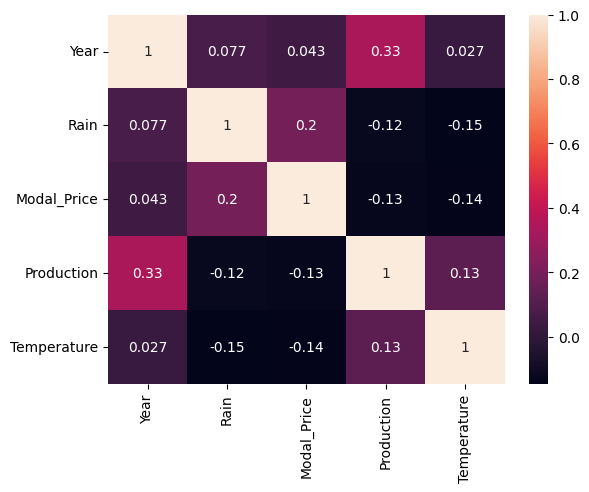

In [435]:
sns.heatmap(rain_data.corr(numeric_only=True),annot=True)

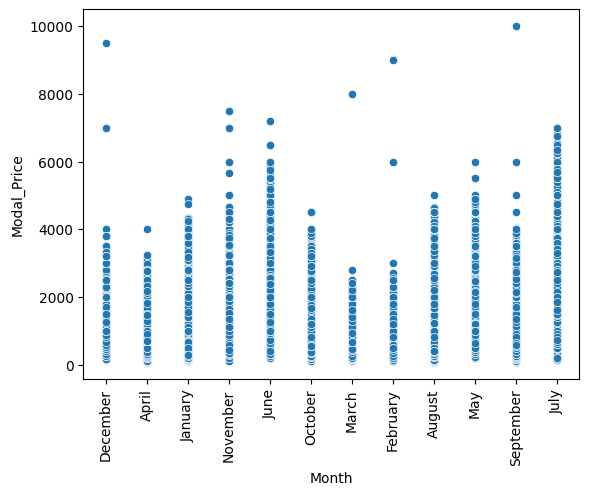

In [436]:
sns.scatterplot(x=rain_data['Month'],y=rain_data['Modal_Price'])
plt.xticks(rotation=90)
plt.show()

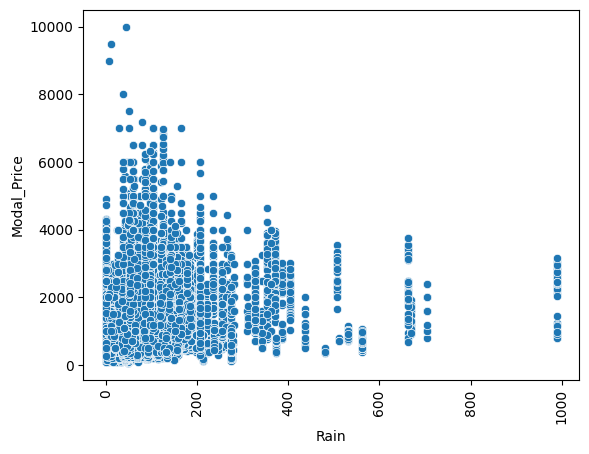

In [437]:
sns.scatterplot(y=rain_data['Modal_Price'],x=rain_data['Rain'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='District_Name'>

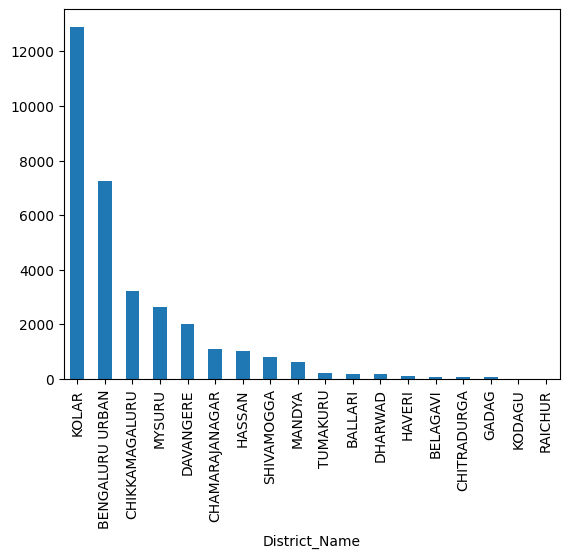

In [438]:
rain_data['District_Name'].value_counts().plot(kind='bar')

<Axes: xlabel='Modal_Price', ylabel='Density'>

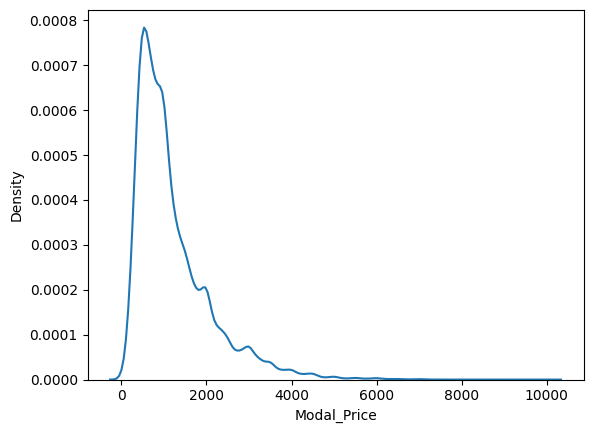

In [439]:
sns.kdeplot(data=rain_data,x='Modal_Price')

In [440]:
x=rain_data.drop(columns=['Modal_Price'])
y=rain_data['Modal_Price']

In [441]:
x

,District_Name,Market_Name,Month,Year,Rain,Production,Temperature
0,HASSAN,Arasikere,December,2019,25.2,1120.0,21.92
1,HASSAN,Arasikere,April,2020,47.2,6329.0,29.44
2,HASSAN,Arasikere,December,2020,16.4,2274.0,20.46
3,HASSAN,Arasikere,January,2020,0.2,6328.0,23.34
4,HASSAN,Arasikere,April,2019,41.9,3075.0,31.08
...,...,...,...,...,...,...,...
32539,TUMAKURU,Tumkur,November,2020,39.5,2339.0,21.68
32540,TUMAKURU,Tumkur,June,2020,152.1,5217.0,25.60
32541,TUMAKURU,Tumkur,October,2020,102.9,2338.0,22.55
32542,TUMAKURU,Tumkur,July,2020,119.2,5217.0,24.15


In [322]:
y

,Modal_Price
0,745
1,280
2,180
3,200
4,190
...,...
3223,500
3224,500
3225,500
3226,500


In [443]:
x1=x.drop(columns=['Rain'])
y1=rain_data['Rain']

In [444]:
x1

,District_Name,Market_Name,Month,Year,Production,Temperature
0,HASSAN,Arasikere,December,2019,1120.0,21.92
1,HASSAN,Arasikere,April,2020,6329.0,29.44
2,HASSAN,Arasikere,December,2020,2274.0,20.46
3,HASSAN,Arasikere,January,2020,6328.0,23.34
4,HASSAN,Arasikere,April,2019,3075.0,31.08
...,...,...,...,...,...,...
32539,TUMAKURU,Tumkur,November,2020,2339.0,21.68
32540,TUMAKURU,Tumkur,June,2020,5217.0,25.60
32541,TUMAKURU,Tumkur,October,2020,2338.0,22.55
32542,TUMAKURU,Tumkur,July,2020,5217.0,24.15


In [445]:
x2=x1.drop(columns=['Production'])
y2=rain_data['Production']

In [446]:
x2

,District_Name,Market_Name,Month,Year,Temperature
0,HASSAN,Arasikere,December,2019,21.92
1,HASSAN,Arasikere,April,2020,29.44
2,HASSAN,Arasikere,December,2020,20.46
3,HASSAN,Arasikere,January,2020,23.34
4,HASSAN,Arasikere,April,2019,31.08
...,...,...,...,...,...
32539,TUMAKURU,Tumkur,November,2020,21.68
32540,TUMAKURU,Tumkur,June,2020,25.60
32541,TUMAKURU,Tumkur,October,2020,22.55
32542,TUMAKURU,Tumkur,July,2020,24.15


In [472]:
x3=x2.drop(columns=['Temperature'])
y3=rain_data['Temperature']

In [473]:
x3

,District_Name,Market_Name,Month,Year
0,HASSAN,Arasikere,December,2019
1,HASSAN,Arasikere,April,2020
2,HASSAN,Arasikere,December,2020
3,HASSAN,Arasikere,January,2020
4,HASSAN,Arasikere,April,2019
...,...,...,...,...
32539,TUMAKURU,Tumkur,November,2020
32540,TUMAKURU,Tumkur,June,2020
32541,TUMAKURU,Tumkur,October,2020
32542,TUMAKURU,Tumkur,July,2020


In [447]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [454]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=5)

In [457]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=5)

In [474]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2,random_state=5)

In [475]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [476]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor

KNN Regression


In [452]:
#Modal_Price
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7398900087928992
MAE 270.02587186971886
MSE 211304.76183745582


In [455]:
#Rain
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x1_train,y1_train)
y1_pred=pipe.predict(x1_test)
print('R2 score',r2_score(y1_test,y1_pred))
print('MAE',mean_absolute_error(y1_test,y1_pred))
print('MSE',mean_squared_error(y1_test,y1_pred))

R2 score 0.9967257845594407
MAE 0.2840411737594119
MSE 27.13472627316024


In [458]:
#Production
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x2_train,y2_train)
y2_pred=pipe.predict(x2_test)
print('R2 score',r2_score(y2_test,y2_pred))
print('MAE',mean_absolute_error(y2_test,y2_pred))
print('MSE',mean_squared_error(y2_test,y2_pred))

R2 score 0.9976798515327496
MAE 79.44168074973115
MSE 1406098.167318328


In [477]:
#Temperature
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x3_train,y3_train)
y3_pred=pipe.predict(x3_test)
print('R2 score',r2_score(y3_test,y3_pred))
print('MAE',mean_absolute_error(y3_test,y3_pred))
print('MSE',mean_squared_error(y3_test,y3_pred))

R2 score 0.9811480065311415
MAE 0.05800614533722573
MSE 0.1843278998310032


Decision Tree Regressor

In [485]:
#Modal_price
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= DecisionTreeRegressor(max_depth=25)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.773583912781148
MAE 254.13778293076592
MSE 183932.94761159518


In [486]:
#Rain
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= DecisionTreeRegressor(max_depth=10)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x1_train,y1_train)
y_pred=pipe.predict(x1_test)
print('R2 score',r2_score(y1_test,y1_pred))
print('MAE',mean_absolute_error(y1_test,y1_pred))
print('MSE',mean_squared_error(y1_test,y1_pred))

R2 score 0.9998999653909266
MAE 0.047572376709293804
MSE 0.8290266124289605


In [487]:
#Production
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= DecisionTreeRegressor(max_depth=10)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x2_train,y2_train)
y2_pred=pipe.predict(x2_test)
print('R2 score',r2_score(y2_test,y2_pred))
print('MAE',mean_absolute_error(y2_test,y2_pred))
print('MSE',mean_squared_error(y2_test,y2_pred))

R2 score 0.9981895117314622
MAE 570.7441773114318
MSE 1097224.7131061375


In [480]:
#Temperature
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= DecisionTreeRegressor(max_depth=20)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x3_train,y3_train)
y3_pred=pipe.predict(x3_test)
print('R2 score',r2_score(y3_test,y3_pred))
print('MAE',mean_absolute_error(y3_test,y3_pred))
print('MSE',mean_squared_error(y3_test,y3_pred))

R2 score 0.9989787933615352
MAE 0.019503145392954235
MSE 0.009984985156750194


XB Reggressor

In [489]:
#Modal_Price
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= XGBRegressor(n_estimators=10,max_depth=25,learning_rate=0.5)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7746216654777527
MAE 253.13359898402956
MSE 183089.93479681425


In [490]:
#Rain
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= XGBRegressor(n_estimators=10,max_depth=25,learning_rate=0.5)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x1_train,y1_train)
y1_pred=pipe.predict(x1_test)
print('R2 score',r2_score(y1_test,y1_pred))
print('MAE',mean_absolute_error(y1_test,y1_pred))
print('MSE',mean_squared_error(y1_test,y1_pred))

R2 score 0.9999152319203994
MAE 0.08800126995784335
MSE 0.7025068076368501


In [491]:
#Production
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= XGBRegressor(n_estimators=10,max_depth=12,learning_rate=0.5)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x2_train,y2_train)
y2_pred=pipe.predict(x2_test)
print('R2 score',r2_score(y2_test,y2_pred))
print('MAE',mean_absolute_error(y2_test,y2_pred))
print('MSE',mean_squared_error(y2_test,y2_pred))

R2 score 0.9999786810304806
MAE 60.264062221853536
MSE 12920.105930091548


In [492]:
#Temperature
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= XGBRegressor(n_estimators=10,max_depth=12,learning_rate=0.5)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x3_train,y3_train)
y3_pred=pipe.predict(x3_test)
print('R2 score',r2_score(y3_test,y3_pred))
print('MAE',mean_absolute_error(y3_test,y3_pred))
print('MSE',mean_squared_error(y3_test,y3_pred))

R2 score 0.9964872985776626
MAE 0.07753038645193573
MSE 0.0343459102604937


Random Forest Regressor

In [465]:
#Modal_Price
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7752647626422522
MAE 253.60334011300577
MSE 182567.4807260792


In [466]:
#Rain
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x1_train,y1_train)
y1_pred=pipe.predict(x1_test)
print('R2 score',r2_score(y1_test,y1_pred))
print('MAE',mean_absolute_error(y1_test,y1_pred))
print('MSE',mean_squared_error(y1_test,y1_pred))

R2 score 0.9998999653909266
MAE 0.047572376709293804
MSE 0.8290266124289605


In [467]:
#Production
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x2_train,y2_train)
y2_pred=pipe.predict(x2_test)
print('R2 score',r2_score(y2_test,y2_pred))
print('MAE',mean_absolute_error(y2_test,y2_pred))
print('MSE',mean_squared_error(y2_test,y2_pred))

R2 score 0.9999913031319321
MAE 3.659784913197112
MSE 5270.632644536412


In [493]:
#Temperature
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x3_train,y3_train)
y3_pred=pipe.predict(x3_test)
print('R2 score',r2_score(y3_test,y3_pred))
print('MAE',mean_absolute_error(y3_test,y3_pred))
print('MSE',mean_squared_error(y3_test,y3_pred))

R2 score 0.9997777862512855
MAE 0.002190075280411324
MSE 0.002172724793363031


Extra Trees Regressor

In [500]:
#Modal_price
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= ExtraTreesRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)

R2 score 0.7746787598578962
MAE 253.1079479436111
MSE 183043.53002433878


In [504]:
#Rain
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= ExtraTreesRegressor()
pipe_rain=Pipeline([('step1',step1),('step2',step2)])
pipe_rain.fit(x1_train,y1_train)
y1_pred=pipe_rain.predict(x1_test)
print('R2 score',r2_score(y1_test,y1_pred))
print('MAE',mean_absolute_error(y1_test,y1_pred))
print('MSE',mean_squared_error(y1_test,y1_pred))
with open('rain_model.pkl', 'wb') as f:
    pickle.dump(pipe_rain, f)

R2 score 0.9999790489993212
MAE 0.008751713012941066
MSE 0.1736292797127067


In [505]:
#Production
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= ExtraTreesRegressor()
pipe_production=Pipeline([('step1',step1),('step2',step2)])
pipe_production.fit(x2_train,y2_train)
y2_pred=pipe_production.predict(x2_test)
print('R2 score',r2_score(y2_test,y2_pred))
print('MAE',mean_absolute_error(y2_test,y2_pred))
print('MSE',mean_squared_error(y2_test,y2_pred))
with open('production_model.pkl', 'wb') as f:
    pickle.dump(pipe_production, f)

R2 score 0.999994351522719
MAE 1.5791834383161774
MSE 3423.191948751729


In [506]:
#Temperature
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2])],remainder='passthrough')
step2= ExtraTreesRegressor()
pipe_temperature=Pipeline([('step1',step1),('step2',step2)])
pipe_temperature.fit(x3_train,y3_train)
y3_pred=pipe_temperature.predict(x3_test)
print('R2 score',r2_score(y3_test,y3_pred))
print('MAE',mean_absolute_error(y3_test,y3_pred))
print('MSE',mean_squared_error(y3_test,y3_pred))
with open('temperature_model.pkl', 'wb') as f:
    pickle.dump(pipe_temperature, f)

R2 score 0.999803495118092
MAE 0.001218896912008037
MSE 0.001921352892917486


In [494]:
data=pd.DataFrame([['BENGALURU URBAN','Channapatana','November',2024]], columns=['District_Name', 'Market_Name','Month', 'Year'])
y2_pred=pipe.predict(data)
print(y2_pred)

[21.27]


In [497]:
!pip install --upgrade streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: streamlit
    Found existing installation: streamlit 0.83.0
    Uninstalling streamlit-0.83.0:
      Successfully uninstalled streamlit-0.83.0


In [499]:
import pickle
pickle.dump(rain_data,open('rain_data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [562]:
%%writefile app.py
import streamlit as st

st.title("Vegetable Price Predictor")
st.text("This app is designed to predict the Vegetable Price based on the ")
st.text("Once the configuration details of the vegetable are entered,")
st.text("please click on the PREDICT button to get the estimated price of the laptop")

import pickle
import numpy as np
pipe=pickle.load(open('pipe.pkl','rb'))
rain_data=pickle.load(open('rain_data.pkl','rb'))
rain_model = pickle.load(open('rain_model.pkl', 'rb'))
production_model = pickle.load(open('production_model.pkl', 'rb'))
price_model = pickle.load(open('pipe.pkl', 'rb'))
temperature_model = pickle.load(open('temperature_model.pkl', 'rb'))



Crop_Name=st.selectbox('Crop Name',['Tomato'])
District=st.selectbox("District Name",rain_data['District_Name'].unique(),index=0)
Market=st.selectbox("Market Name",rain_data['Market_Name'].unique(),index=0)
Year=st.selectbox("Year",[2024,2025,2026,2027,2028,2029,2030],index=0)
Month=st.selectbox("Month",['January','February','March','April','May','June','July','August','September','October','November','December'],index=10)

month_mapping = {
    'January': ('April', 1),
    'February': ('May', 0),
    'March': ('June', 0),
    'April': ('July', 0),
    'May': ('August', 0),
    'June': ('September', 0),
    'July': ('October', 0),
    'August': ('November', 0),
    'September': ('December', 0),
    'October': ('January', 1),
    'November': ('February', 1),
    'December': ('March', 1)
}

# Get future month and year increment
future_month, year_increment = month_mapping[Month]
future_year = Year + year_increment

def predict_temp(district, market, year, month):
    features = np.array([[district, market, future_month, future_year]])
    temperature = temperature_model.predict(features)[0]
    return temperature
temperature=predict_temp(District, Market, Year, Month)
def predict_production(district, market, year, month,temperature):
    features = np.array([[district, market, future_month, future_year,temperature]])
    production = production_model.predict(features)[0]
    return production
production=predict_production(District, Market, Year, Month,temperature)
def predict_rain(district, market, year, month,temperature,production):
    features = np.array([[district, market, future_month, future_year,temperature,production]])
    rain = rain_model.predict(features)[0]
    return rain
rain=predict_rain(District, Market, Year, Month,temperature,production)

if st.button('Predict Price'):
    query=np.array([District,Market,Month,Year,temperature,production,rain])
    query=query.reshape(1,-1)
    predicted_price = price_model.predict(query)
    st.write(f"Predicted Price of the month {future_month}-{future_year} per Quintal: {predicted_price[0]:.2f} .Rs")
    st.write(f"The price may vary from Max: {predicted_price[0] + 120:.2f}.Rs to Min: {predicted_price[0] - 120:.2f}.Rs")

Overwriting app.py


In [546]:
!pip install streamlit pyngrok
from pyngrok import ngrok


In [547]:
!streamlit run app.py &>/dev/null &


In [548]:
!ngrok authtoken 2o7KVGfLSeAWYXxEC8SXa6HGk5E_2CsmbwbM3KprYSpciyDFU

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [549]:
!streamlit run app.py &>/dev/null &
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Access the Streamlit app here:", public_url)


Access the Streamlit app here: NgrokTunnel: "https://2510-34-67-68-62.ngrok-free.app" -> "http://localhost:8501"
